In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 7.15 μs


In [11]:
# configuration settings
data_root = '/ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/'
mask_roi = 'lung_regions'
mesh_version = 10
num_levels = 3
num_conv_layers = 2
conv_channels = 32
conv_kernel_size = 3
output_func = 'relu'
batch_size = 1
learning_rate = 1e-5
interp_size = 5
interp_type = 'tent'
rho_value = 0

save_every = 10
save_prefix = '2024-11-30_emory/asdf'
#save_prefix = f'2024-09-30__initial/train__batch_size__{mesh_radius}__{interp_radius}__{interp_sigma}__{output_func}__{batch_size}/'

In [12]:
%autoreload
case_name = 'Case1Pack'
train_images = project.imaging.Emory4DCT(data_root, case_names=case_name, phases=range(10, 100, 10))
test_images = project.imaging.Emory4DCT(data_root, case_names=case_name, phases=[0])
train_images, test_images

(Emory4DCT('/ocean/projects/asc170022p/shared/Data/4DLungCT/Emory', 1 cases),
 Emory4DCT('/ocean/projects/asc170022p/shared/Data/4DLungCT/Emory', 1 cases))

In [13]:
train_images[0].load_niftis()
train_images[0].load_totalseg_masks(roi='lung_regions')
train_images[0].totalseg_mask

Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T10.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T20.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T30.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T40.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T50.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T60.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T70.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T80.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T90.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/TotalSegment/case1_T10/lung_regions.nii.gz
Loading /ocean/projects/asc170

<xarray.DataArray 'mask' (phase: 9, roi: 1, x: 256, y: 256, z: 94)> Size: 444MB
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
...
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]]])
Coordinates:
  * phase    (phase) int64 72B 10 20 30 40 50 60 70 80 90
  * x        (x) float64 2kB 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * y        (y) float64 2kB 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * z        (z) float64 752B 0.0 2.5 5.0 7.5 10.0 ... 225.0 227.5 230.0 232.5
  * roi      (roi) <U12 48B 'lung_regions'

In [14]:
train_images[0].load_medpseg_masks(roi=['findings', 'consolidation', 'ggo'])
train_images[0].medpseg_mask

Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T10_findings.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T10_consolidation.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T10_ggo.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T20_findings.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T20_consolidation.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T20_ggo.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T30_findings.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T30_consolidation.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/medpseg/case1_T30_ggo.nii.gz
Loading /ocean/projects/asc170022p/shared/Data

<xarray.DataArray 'mask' (phase: 9, roi: 3, x: 256, y: 256, z: 94)> Size: 1GB
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
...
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]]])
Coordinates:
  * phase    (phase) int64 72B 10 20 30 40 50 60 70 80 90
  * x        (x) float64 2kB 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * y        (y) float64 2kB 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * z        (z) float64 752B 0.0 2.5 5.0 7.5 10.0 ... 225.0 227.5 230.0 232.5
  * roi      (roi) <U13 156B 'findings' 'consolidation' 'ggo'

In [15]:
train_images[0].load_niftis()
train_images[0].load_totalseg_masks(roi=mask_roi)
train_images[0].load_medpseg_masks(roi=mask_roi2)
print(train_images[0].medpseg_mask.sum())

test_images[0].load_niftis()
test_images[0].load_totalseg_masks(roi=mask_roi)
test_images[0].load_medpseg_masks(roi=mask_roi2)
test_images[0].load_displacements(moving_phase=10, relative=True)
print(test_images[0].medpseg_mask.sum())
print(test_images[0].medpseg_mask.max())

Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T10.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T20.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T30.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T40.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T50.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T60.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T70.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T80.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/NIFTI/case1_T90.nii.gz
Loading /ocean/projects/asc170022p/shared/Data/4DLungCT/Emory/Case1Pack/TotalSegment/case1_T10/lung_regions.nii.gz
Loading /ocean/projects/asc170

NameError: name 'mask_roi2' is not defined

In [18]:
mask = test_images[0].totalseg_mask.sel(roi=mask_roi)
mask.name = 'regions'

project.visual.XArrayViewer(
    mask, x='x', y='z'
).update_index(y=120, phase=0)

mask2 = test_images[0].medpseg_mask.sel(roi=mask_roi2)
mask2.name = 'regions'

project.visual.XArrayViewer(
    mask2, x='x', y='z'
).update_index(y=120, phase=0)

project.visual.XArrayViewer(
    test_images[0].anat, x='x', y='z'
).update_index(y=120, phase=0)

project.visual.XArrayViewer(
    train_images[0].anat, x='x', y='z'
).update_index(y=120, phase=0)

disp = test_images[0].disp.sel(fixed_phase=0, moving_phase=10) * (test_images[0].mask.sel(phase=0, roi='lung_regions') > 0)
disp.name = 'displacement'

project.visual.XArrayViewer(
    disp, x='x', y='z'
)

AttributeError: 'Emory4DCTCase' object has no attribute 'totalseg_mask'

In [19]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

shape = test_images[0].shape
resolution = test_images[0].resolution

coords = np.stack(
    np.meshgrid(
        np.arange(shape[0]) * resolution[0],
        np.arange(shape[1]) * resolution[1],
        np.arange(shape[2]) * resolution[2],
        indexing='xy'
    ),
    axis=-1
).reshape(-1, 3)

disp = test_images[0].disp.sel(fixed_phase=0, moving_phase=10).values.reshape(-1, 3)
mask = (test_images[0].mask.sel(phase=0, roi='lung_regions') > 0).values.reshape(-1)

coords = coords[mask][::8,:]
disp = disp[mask][::8,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(coords[:,1], coords[:,0], coords[:,2], disp[:,1], disp[:,0], disp[:,2])

AttributeError: 'Emory4DCTCase' object has no attribute 'shape'

In [21]:
train_examples = train_images.get_examples(mask_roi, mesh_version)
test_examples = test_images.get_examples(mask_roi, mesh_version)
len(train_examples), len(test_examples)

(9, 1)

In [22]:
%autoreload
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset(test_examples)

In [ ]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [ ]:
%autoreload
trainer = project.training.Trainer(
    model=model,
    train_data=train_data,
    test_data=test_data,
    batch_size=batch_size,
    learning_rate=learning_rate,
    save_every=save_every,
    save_prefix=save_prefix,
    interp_size=interp_size,
    interp_type=interp_type,
    rho_value=rho_value,
    sync_cuda=True
)

In [16]:
load_epoch = 0
if load_epoch:
    trainer.load_state(epoch=load_epoch)

In [17]:
import torch

# manual forward pass
a_image, e_image, u_image, mask, resolution, pde, name = test_data[0]

a_image = a_image.to('cuda')
e_image = e_image.to('cuda')
u_image = u_image.to('cuda')
mask = (mask > 0).to('cuda')

e_pred_image = model.forward(a_image.unsqueeze(0))[0] * 1000

points = pde.points.to('cuda')
radius = pde.radius.to('cuda')

a_dofs = project.interpolation.interpolate_image(
    a_image, mask, resolution, points, radius,
    kernel_size=interp_size,
    kernel_type=interp_type,
).to(dtype=torch.float64, device='cpu')

rho_dofs = (a_dofs + 1000)

e_pred_dofs = project.interpolation.interpolate_image(
    e_pred_image, mask, resolution, points, radius,
    kernel_size=interp_size,
    kernel_type=interp_type,
).to(dtype=torch.float64, device='cpu')

u_true_dofs = project.interpolation.interpolate_image(
    u_image, mask, resolution, points, radius,
    kernel_size=interp_size,
    kernel_type=interp_type,
).to(dtype=torch.float64, device='cpu')

u_pred_dofs = pde.forward(
    u_true_dofs[None,:,:],
    e_pred_dofs[None,:,0],
    rho_dofs[None,:,0]
)[0]

u_pred_dofs.shape

NameError: name 'test_data' is not defined

[[0.55076782 0.60289624 0.79605156]
 [0.52430981 0.60773392 0.82089468]
 [0.53109136 0.61113171 0.82617514]
 ...
 [0.56415729 0.62107711 0.22047078]
 [0.50490417 0.61266416 0.24349429]
 [0.44008518 0.53412459 0.30842812]]


<IPython.core.display.Javascript object>


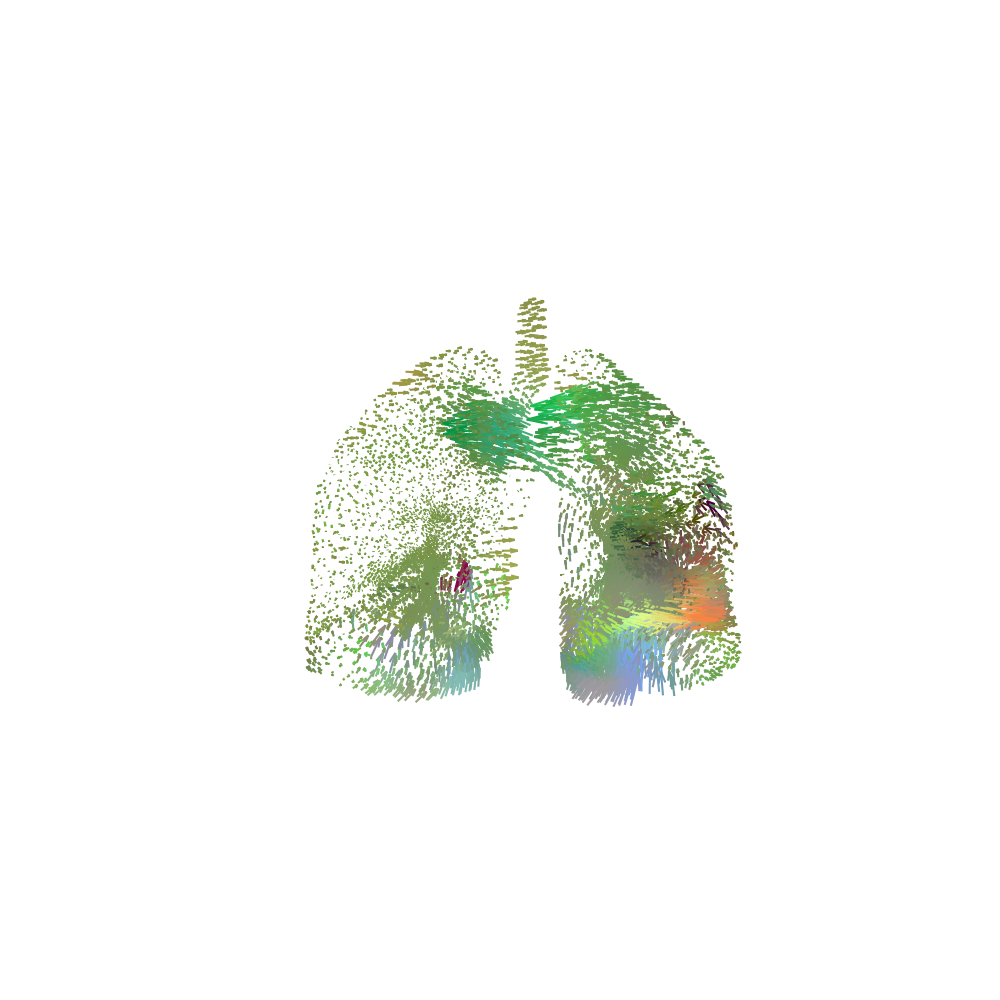

In [21]:
# plot dofs

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

coords = pde.points.detach().cpu().numpy()
disp = u_pred_dofs.detach().cpu().numpy() * 25

x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
u_x = disp[:,0]
u_y = disp[:,1]
u_z = disp[:,2]

c = (disp - disp.min(axis=0)) / (disp.max(axis=0) - disp.min(axis=0))
print(c)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=-15, azim=-90, roll=0)
q = ax.quiver(x, y, z, u_x, u_y, u_z, colors=c, arrow_length_ratio=0.5)
ax.set_axis_off()

In [ ]:
# plot dofs

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

coords = pde.points.detach().cpu().numpy()
elast = e_pred_dofs.detach().cpu().numpy()
log_e = np.log10(elast)

x = coords[:,0]
y = coords[:,1]
z = coords[:,2]

c = (log_e - log_e.min(axis=0)) / (log_e.max(axis=0) - log_e.min(axis=0))
s = (log_e - log_e.min(axis=0)) / (log_e.max(axis=0) - log_e.min(axis=0)) * 50 + 5
a = (log_e - log_e.min(axis=0)) / (log_e.max(axis=0) - log_e.min(axis=0)) / 2
print(c)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=-15, azim=-90, roll=0)
q = ax.scatter(x, y, z, c=c, cmap=project.visual.mre_color_map(symmetric=False), s=s, alpha=a)
ax.set_axis_off()

In [ ]:
%%time
# test forward pass and initialize viewers
trainer.timer.start()
trainer.run_next_batch(phase='test', epoch=load_epoch)

In [ ]:
trainer.save_metrics()
trainer.save_viewers()
trainer.save_state()

In [ ]:
%%time
trainer.timer.start()
trainer.train(num_epochs=100)

In [ ]:
trainer.evaluator.metrics

In [ ]:
trainer.timer.usage

In [ ]:
trainer.timer.usage.groupby(['phase', 'event']).mean().sort_values('time')

In [ ]:
trainer.timer.usage.reset_index()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

t = trainer.timer.usage.reset_index()

fig, ax = plt.subplots()
sns.lineplot(t[t.phase == 'train'], y='mem_used', x='batch')
fig.tight_layout()

In [ ]:


fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage, y='event', x='time', hue='phase', estimator='mean', ax=ax)
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage , y='event', x='time', hue='phase', estimator='sum', ax=ax)
#ax.set_xscale('log')
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='sum', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [ ]:
test_data[0][-5].mean()

In [5]:
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'